In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [9]:
crop_df = pd.read_csv("C:/Users/hasec/OneDrive/Desktop/Crop and Fertiliser Recommendation System using Machine Learning/crop.csv")


In [11]:
print("Crop Dataset Head:\n", crop_df.head())
print("\nCrop Dataset Info:")
print(crop_df.info())
print("\nMissing Values:\n", crop_df.isnull().sum())
print("\nSummary Statistics:\n", crop_df.describe())



Crop Dataset Head:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Crop Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1

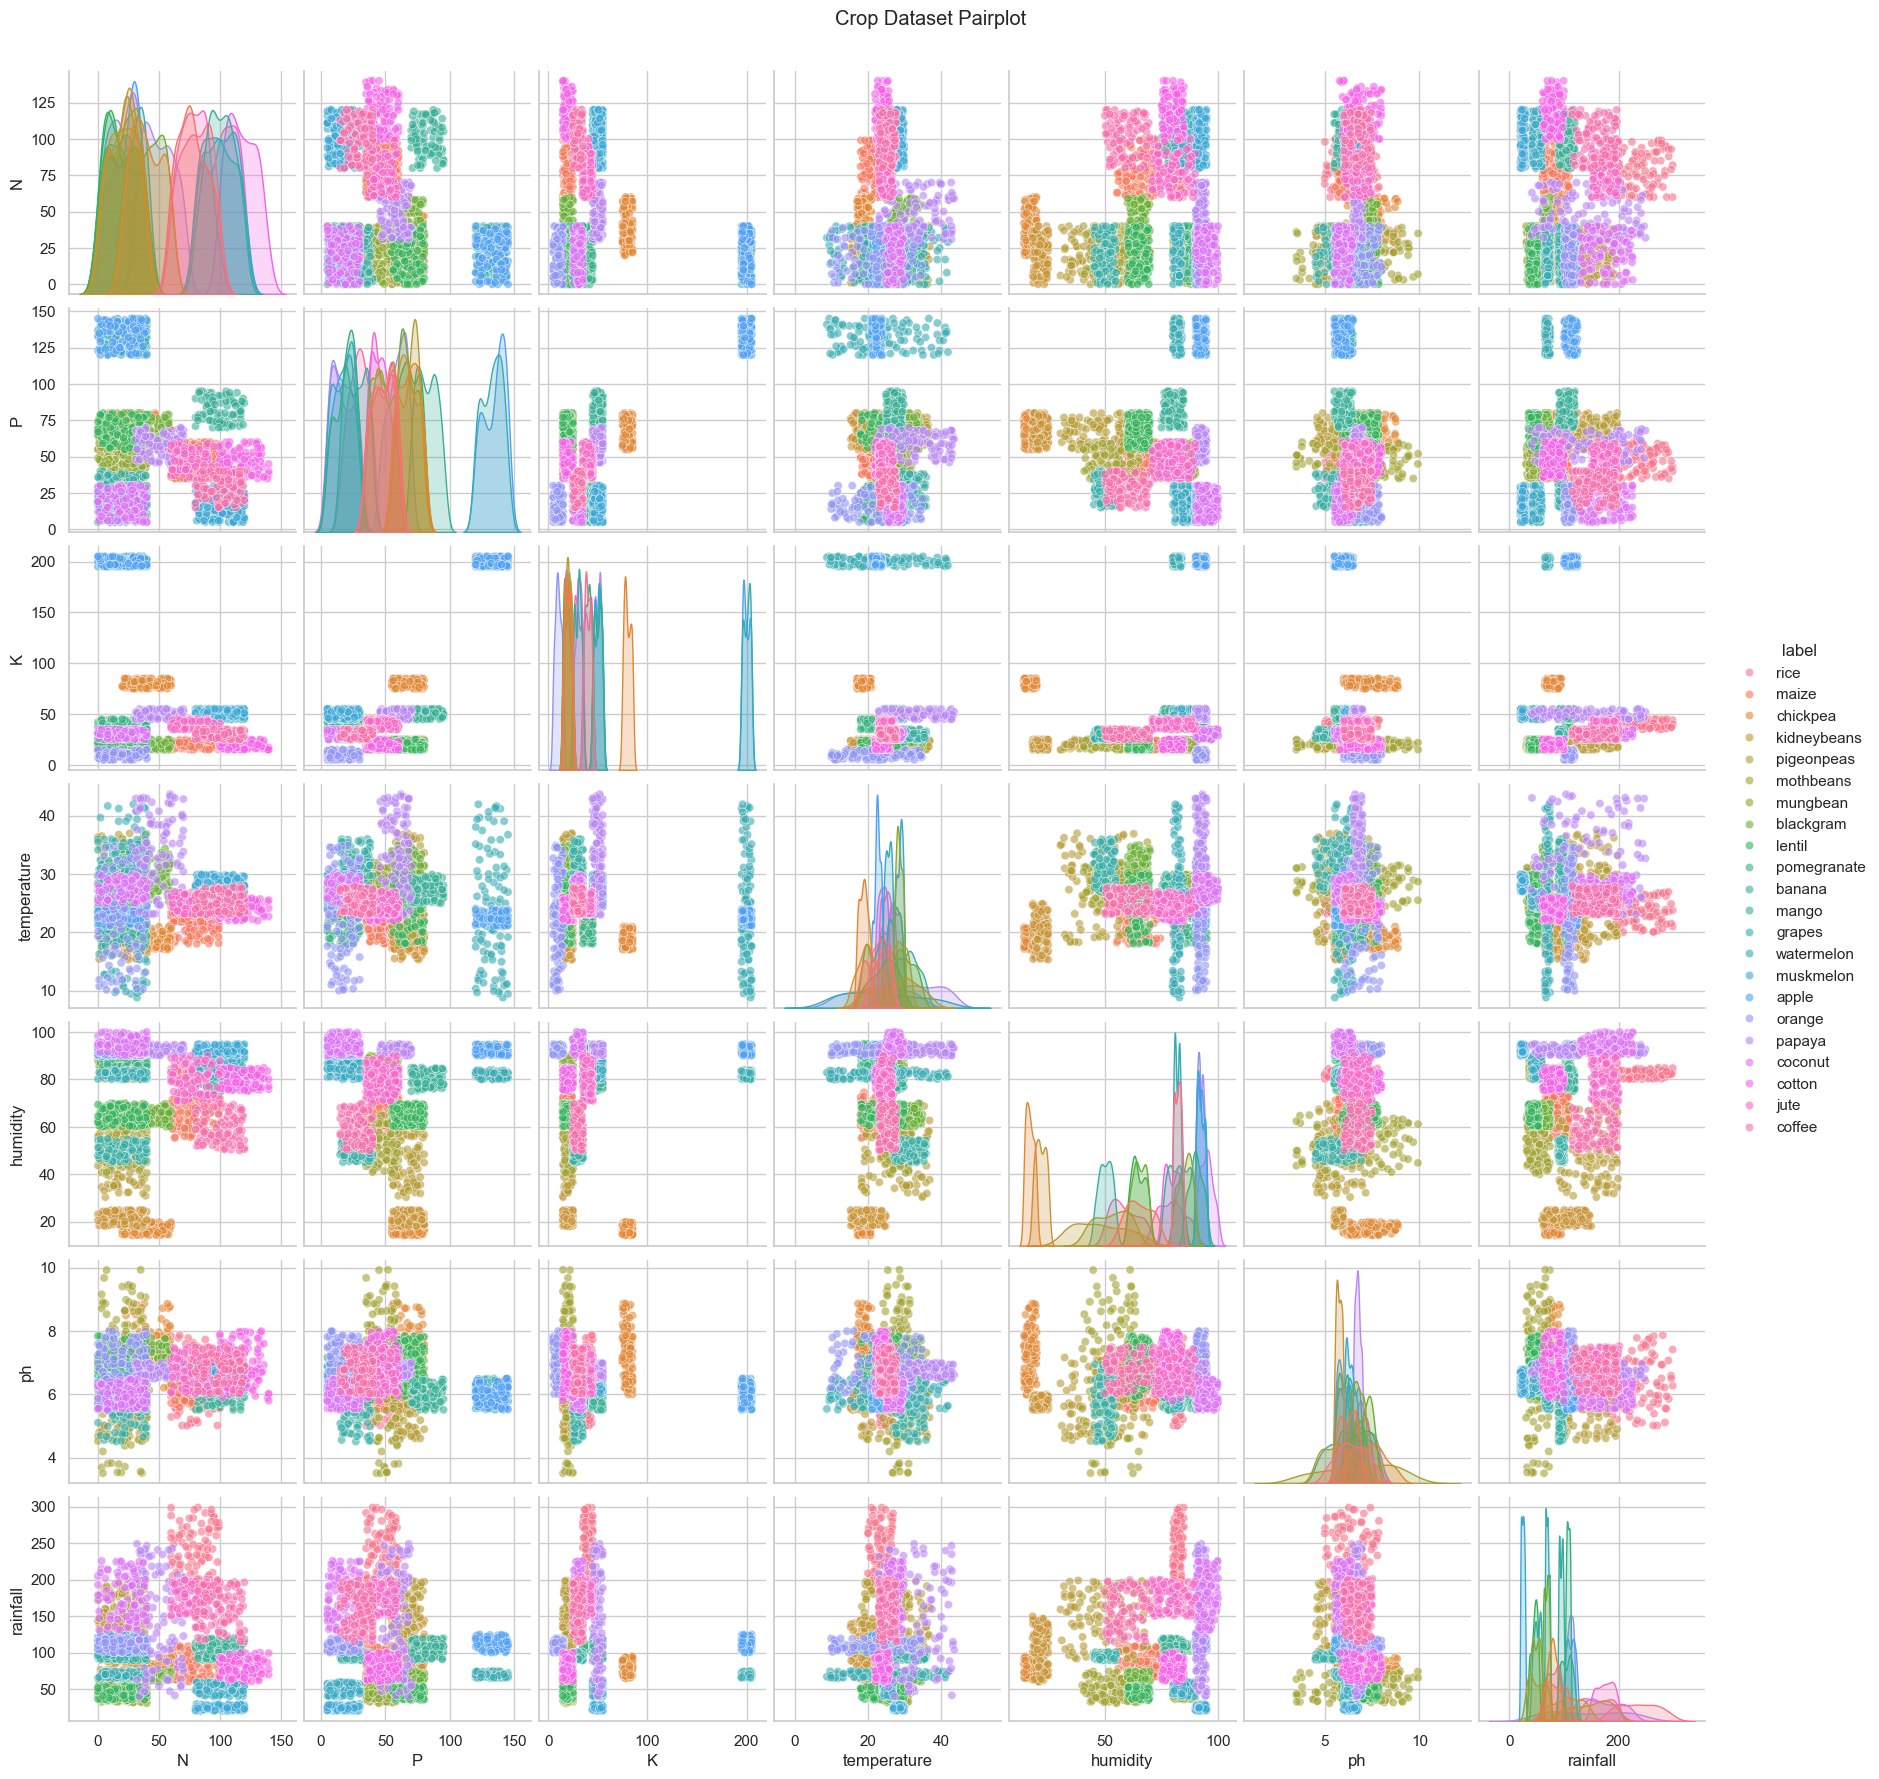

In [13]:
sns.set(style='whitegrid')

sns.pairplot(crop_df, hue='label', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Crop Dataset Pairplot", y=1.02)
plt.show()



In [17]:
X_crop = crop_df.drop('label', axis=1)
y_crop = crop_df['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)


In [25]:
crop_model = RandomForestClassifier(n_estimators=100, random_state=42)
crop_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
y_pred = crop_model.predict(X_test)
print("\nCrop Recommendation Accuracy:", accuracy_score(y_test, y_pred))
print("\nCrop Classification Report:\n", classification_report(y_test, y_pred))



Crop Recommendation Accuracy: 0.9931818181818182

Crop Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
 

In [29]:
# Sample prediction
sample_crop = [[120, 82, 13, 90.8, 182, 2.5, 102.9]]
print("Predicted Crop:", crop_model.predict(sample_crop)[0])


Predicted Crop: cotton


C:\Users\hasec\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
